In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 13,6
import numpy as np
from scipy import stats as st
import re

In [2]:
df = pd.read_csv('HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Признаки:
* 1.satisfaction_level​ - Уровень удовлетворенности работой
* 2.Last_evaluation ​- Время с момента последней оценки в годах
* 3.number_projects​ - Количество проектов, выполненных за время работы
* 4.average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц
* 5.time_spend_company​ - Стаж работы в компании в годах
* 6.work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником
* 7.left​ - уволился ли сотрудник
* 8.promotion_last_5years​ - повышался ли сотрудник за последние пять лет
* 9.department ​- отдел в котором работает сотрудник
* 10.salary​ - относительный уровень зарплаты

* Рассчитайте основные статистики для переменны

In [3]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименеескоррелированные переменные.

In [5]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


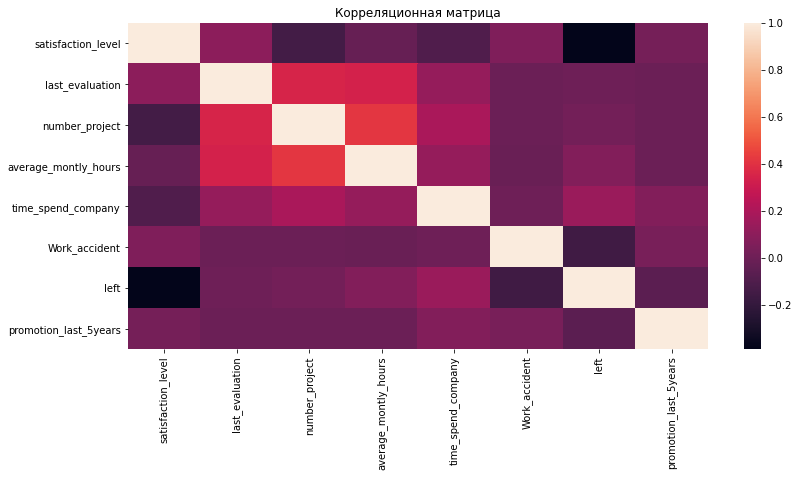

In [6]:
ax = plt.axes()
sns.heatmap(df.corr())
ax.set_title('Корреляционная матрица')
plt.show()

* Самые скоррелированные переменнные: last_evaluation & number_project
* Наименеескоррелированные переменные: Work_accident & time_spend_company 

# Рассчитайте сколько сотрудников работает в каждом департаменте

In [20]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

 Показать распределение сотрудников по зарплатам.

In [21]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [67]:
df_sales = df[['department', 'salary']]

In [66]:
res = df_sales.loc[df_sales['salary'].isin(['low'])]
res = res.groupby('department').agg({'salary': ['count']}).reset_index()
res.rename(columns={'department': 'department', 'count': 'low'}, inplace=True)

In [65]:
res2 = df_sales.loc[df_sales['salary'].isin(['medium'])]
res2 = res2.groupby('department').agg({'salary': ['count']}).reset_index()
res2.rename(columns={'department': 'department', 'count': 'medium'}, inplace=True)

In [64]:
res3 = df_sales.loc[df_sales['salary'].isin(['high'])]
res3 = res3.groupby('department').agg({'salary': ['count']}).reset_index()
res3.rename(columns={'department': 'department', 'count': 'high'}, inplace=True)

In [63]:
t = res.merge(res2, how='outer', on='department')
t1 = t.merge(res3, how='outer', on='department')
t1

department salary            
                  low medium high
0           IT    609    535   83
1        RandD    364    372   51
2   accounting    358    335   74
3           hr    335    359   45
4   management    180    225  225
5    marketing    402    376   80
6  product_mng    451    383   68
7        sales   2099   1772  269
8      support   1146    942  141
9    technical   1372   1147  201

 Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [73]:
data = df[['average_montly_hours', 'salary']]
dat = data.sort_values(['average_montly_hours'], ascending=[False])
dat

,average_montly_hours,salary
803,310,medium
809,310,medium
1717,310,low
14975,310,medium
1936,310,medium
...,...,...
9221,96,medium
2678,96,medium
7492,96,high
8605,96,low


In [97]:
d = dat.loc[dat['salary'].isin(['low'])]
d3 = dat.loc[dat['salary'].isin(['high'])]
d.mean()

average_montly_hours    200.996583
dtype: float64

In [98]:
d3.mean()

average_montly_hours    199.867421
dtype: float64

* Н0 Время проводимое сотрудниками с высоким окладом и низким различается

In [93]:
alpha = 0.05

In [95]:
result = st.ttest_ind(d['average_montly_hours'], d3['average_montly_hours'], equal_var = False)
print(result)
if (result.pvalue < alpha) & (result.statistic < 0):
                           print('Отвергаем Н0, время проводимое на работе сотрудниками с высоким и низким окладом одинаковое')  
else:
                           print('Не отвергаем Н0, время проводимое сотрудниками на работе с высоким окладом и низким различается')
                           

Ttest_indResult(statistic=0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем Н0, время проводимое сотрудниками на работе с высоким окладом и низким различается


Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [39]:
#Оставляем неуволившихся сотрудников
not_left = df.loc[df['left'].isin(['0'])]

In [43]:
fraction = round(not_left['promotion_last_5years'].mean()*100, 2)
print('Доля неуволившихся сотрудников с повышением за последние 5 лет:', fraction)
satisfaction = round(not_left['satisfaction_level'].mean()*100, 2)
print('Средняя степень удовлетворенности у неуволившихся сотрудников:', satisfaction)
projects = round(not_left['number_project'].mean(), 2)
print('Среднее количество проектов у неуволившихся сотрудников:', projects)

Доля неуволившихся сотрудников с повышением за последние 5 лет: 2.63
Средняя степень удовлетворенности у неуволившихся сотрудников: 66.68
Среднее количество проектов у неуволившихся сотрудников: 3.79


In [45]:
#Оставим уволившихся сотрудников
Left = df.loc[df['left'].isin(['1'])]

In [44]:
fraction1 = round(Left['promotion_last_5years'].mean()*100, 2)
print('Доля уволившихся сотрудников с повышением за последние 5 лет:', fraction1)
satisfaction1 = round(Left['satisfaction_level'].mean()*100, 2)
print('Средняя степень удовлетворенности у уволившихся сотрудников:', satisfaction1)
projects1 = round(Left['number_project'].mean(), 2)
print('Среднее количество проектов у уволившихся сотрудников:', projects1)

Доля уволившихся сотрудников с повышением за последние 5 лет: 0.53
Средняя степень удовлетворенности у уволившихся сотрудников: 44.01
Среднее количество проектов у уволившихся сотрудников: 3.86


Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) Оценить качество модели на тестовой выборки

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [37]:
X = df[['promotion_last_5years', 'number_project', 'time_spend_company', 'average_montly_hours']]
y = df['left']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [39]:
X_train.shape

(10499, 4)

In [40]:
y_train.shape

(10499,)

In [41]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq 'т.е. в 2.9% случаев изменения х приводят к изменению y.')

coefficient of determination: 0.02958018741078894


In [50]:
print(f'model.intercept: {model.intercept_}')
print(f'model.coef: {model.coef_}')

model.intercept: 0.006704688203888809
model.coef: [-0.20666124 -0.00824477  0.04132409  0.00060925]


In [47]:
y_pred = model.predict(X)
y_pred

array([0.20983959, 0.37304875, 0.28000351, ..., 0.2013101 , 0.29312228,
       0.21044884])

In [54]:
print(f'determination coef test: {model.score(X_test, y_test)}')
print('Точность подбора модели низкая,\nэто значит, что только в 3% случаев факторы влияют на увольнение сотрудника')

determination coef test: 0.030245992754832196
Точность подбора модели низкая,
это значит, что только в 3% случаев факторы влияют на увольнение сотрудника
